<b>Coding Assignment 4<br>
CS 401: Quantum Computing <br>
Dr. Kell, Spring 2023 </b>

<b> Instructions </b> 

To complete the assignment, please fill in all coding cells as instructed below, and then submit the file on Notebowl once completed. Before you turn in your submission, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells (in the menubar, select Cell → Run All). Make sure you fill in any place that says YOUR CODE GOES HERE.
    
<b> Constraints on references and collaborations</b>
    
 <item> <i> You may:</i> Reference any chapter from the course textbook, references, and relevant Wikipedia pages. You are permitted to collaborate with others in the class in groups of 2-3, but these collaborations should be solely conceptual (i.e., clarifying the problem, brainstorming algorithms, etc.).
     
 <item> <i> You may not</i>: 
     
* You may not share code or work with others when writing your code.
<br> 
     
* Reference the Qiskit CHSH guide.
    
<b> Finally: Be sure to use proper coding style for all your solutions!</b> For example, you should write docstrings for all functions, include useful in-line comments explaining how your code works, write clean code with readable variable names, etc.. You will lose points if you write sloppy code with poor style (e.g., not writing docstrings for any of your functions). 
    
Best of luck!

In [1]:
# Specify your name below
NAME = "Your Name"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random, cmath
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, state_visualization
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city 
import qis401

## Part 1 [25 points] 

In this first part, you will write a Monte Carlo simulation that experimentally computes the set of optimal deterministic strategies for the classical version of the CHSH game. (By 'deterministic' we mean that both Alice and Bob are not allowed to use randomization when determining their response.) 

Observe that given the setup of the game, a deterministic strategy for a fixed player can be specified by a binary function  $f:\{0, 1\} \rightarrow \{0, 1\}$, where the input bit corresponds to the move played by either Charlie/Lucy, and the output bit corresponds to the response played by Alice/Bob. 

Thus, both Alice and Bob have four possibilities to choose from: 

* $f(0) = 0 \text{ and } f(1) = 0$ (call this strategy '0s') 
* $f(0) = 1 \text{ and } f(1) = 1$ (call this strategy '1s') 
* $f(0) = 0 \text{ and } f(1) = 1$ (call this strategy 'same') 
* $f(0) = 1 \text{ and } f(1) = 0$ (call this strategy 'flip') 

The goal of the simulation is to (i) verify that optimal win probability is 0.75 and (ii) determine which strategy pairs achieve this win probability.

In particular, implement a function called <code>optimal_chsh_strats(trials_per_strat)</code> that takes in an int <code>trials_per_strat</code> and returns a list of tuples specifying the optimal strategy pairs using the naming convention above (e.g., based on our discussion in class, <code>('0s', '0s')</code> should one of the tuples in the list).

To determine win probability for each strategy pair, the function must use a Monte Carlo algorithm to simulate the game <code>trials_per_strat</code> number of times. As you increase <code>trials_per_strat</code>, the win probabilities of the optimal strategies should converge to 0.75. 

Furthermore, your function must also generate a plot that displays the win probability for each strategy pair. For example, your plot might look something like: 

<div align="center">
<img src="classic_chsh_plot.png" width="400">
</div>

You are not required to make a 3D plot, but the plot should make it fairly clear what the win probabilities are of each strategy pair. (For examples on how to generate 3D plots in matplotlib, see [matplotlib 3D plot page](https://matplotlib.org/stable/gallery/mplot3d/index.html) as well as this [tutorial](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.02-3D-Plotting.html))

Also note there are no requirements on how to structure your implementation, but it will be best if you write additional helper functions that breakdown the solution into natural subroutines (e.g., you will likely lose points on coding style if your solution is one giant messy function that's difficult to read).

In [3]:
# YOUR FUNCTION DEFINITIONS GO HERE (DELETE THIS COMMENT)

In [4]:
# GENERATE YOUR OUTPUT HERE (DELETE THIS COMMENT)

In [5]:
def classic_chsh_trial(alice_strat, bob_strat):
    x = random.randrange(0,2)
    y = random.randrange(0,2)
    a = alice_strat[x]
    b = bob_strat[y]
    return (a+b) % 2 == x*y 

def classic_chsh_montecarlo(alice_strat, bob_strat, trials):
    wins = 0 
    for t in range(trials):
        if classic_chsh_trial(alice_strat, bob_strat):
            wins += 1
    return wins/trials

def make_chsh_plot(success_probs, labs):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(projection='3d')
    plt.xlabel('Alice Strategy')
    plt.ylabel('Bob Strategy')
    _x = np.arange(4)
    _y = np.arange(4)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()
    xyticks = [t+0.5 for t in range(4)]
    zticks = [t/4 for t in range(1,5)]
    
    ax.bar3d(x, y, .05, .3, .3,  np.array(success_probs).ravel(), shade=True, alpha=0.75)
    ax.set_title('CHSH Win Probs for Determinstic Strategies')
    ax.set(xticks = xyticks , yticks = xyticks, zticks = zticks,  xticklabels = labs, yticklabels = labs)
    plt.show()
    
def optimal_chsh_strats(trials_per_strat):
    strat_list = [{0:0, 1:0},  {0:1, 1:1}, {0:0, 1:1},  {0:1, 1:0}] 
    success_probs = [[0 for b in range(4)] for a in range(4)]
    labs = ['0s', '1s', 'same', 'flip']
    
    for (a,b) in [(a,b) for b in range(4) for a in range(4)]:
        alice_strat, bob_strat = strat_list[a], strat_list[b] 
        success_probs[a][b] = classic_chsh_montecarlo(alice_strat, bob_strat, trials_per_strat)
            
    make_chsh_plot(success_probs, labs)
    optimal_list = []
    max_prob = max([success_probs[a][b] for a in range(4) for b in range(4)])
    for (a,b) in [(a,b) for b in range(4) for a in range(4)]:
        if abs(round(success_probs[a][b],2) - round(max_prob, 2)) <= 0.1:
            optimal_list.append((labs[a], labs[b]))
    return optimal_list

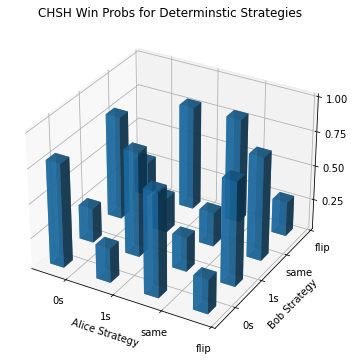

[('0s', '0s'), ('same', '0s'), ('1s', '1s'), ('flip', '1s'), ('0s', 'same'), ('flip', 'same'), ('1s', 'flip'), ('same', 'flip')]
Alice plays 0s and Bob plays 0s
Alice plays same and Bob plays 0s
Alice plays 1s and Bob plays 1s
Alice plays flip and Bob plays 1s
Alice plays 0s and Bob plays same
Alice plays flip and Bob plays same
Alice plays 1s and Bob plays flip
Alice plays same and Bob plays flip


In [6]:
trials = 20000
opt_strats = optimal_chsh_strats(trials)
print(opt_strats)
for (a,b) in opt_strats:
    print("Alice plays {} and Bob plays {}".format(a, b))

## Part 2 [25 points] 

You will now implement the optimal quantum CHSH strategy we saw in class using Qiskit. In particular, you must implement the following two functions:

* <code>make_chsh_circuit()</code>: returns a QuantumCircuit object implementing the optimal quantum CHSH game strategy. Your circuit should have four classical registers that at the end of the computation collectively contain the outputs played by the four players in the game (Alice, Bob, Charlie, and Lucy). Note that - as discussed in lecture - since you cannot initialize the values of ClassicalRegister objects, you will need to simulate Charlie and Lucy's outputs using Quantum gates + measurement. 


* <code>quantum_chsh_montecarlo(trials)</code>: performs a Monte Carlo algorithm that simulates the CHSH game quantum circuit <code>trials</code> number of times and returns the percentage of trials that result in wins. On each trial, you should call <code>make_chsh_circuit()</code> to construct the circuit. Then after simulating the circuit, you should then use the values of the four classical registers to determine the outcome of the game. 

To display your output, in the first cell you should call <code>make_chsh_circuit()</code> to obtain the circuit and then use the <code>draw()</code> method to display the circuit itself. In the next cell, call  <code>quantum_chsh_montecarlo()</code> and then print the resulting probability. As you increase the number of trials, your answer should converge to $\cos^2\left(\frac{\pi}{8}\right) \approx .8535$.


In [7]:
def make_chsh_circuit():
    alice = QuantumRegister(1, "alice")
    bob = QuantumRegister(1, "bob")
    x_coin = QuantumRegister(1, "x coin")
    y_coin = QuantumRegister(1, "y coin")
    x = ClassicalRegister(1, "x measure")
    y = ClassicalRegister(1, "y measure")
    a_meas = ClassicalRegister(1, "alice measure")
    b_meas = ClassicalRegister(1, "bob measure")
    circ = QuantumCircuit(alice, bob, x, y, x_coin, y_coin, a_meas, b_meas)
    
    # put alice and bob qubit in EPR pair
    circ.h(alice)
    circ.cx(alice, bob)
    circ.barrier() 
    
    # select random values to be played by charlie
    circ.h(x_coin)
    circ.h(y_coin)
    circ.measure(x_coin, x)
    circ.measure(y_coin, y)
    circ.barrier() 

    # alice and bob operations based on charlie's moves
    circ.h(alice).c_if(x, 1)
    circ.ry(-cmath.pi/4, bob).c_if(y, 0)
    circ.ry(cmath.pi/4, bob).c_if(y, 1)
    circ.barrier() 
    
    # alice and bob measurements
    circ.measure(alice, a_meas)
    circ.measure(bob, b_meas)
    
    return circ

def quantum_chsh_trial():
    circ = make_chsh_circuit()
    result = qis401.simulate_circuit(circ, 1)
    output_string = list(result.get_counts().keys())[0]
    alice_result = int(output_string[0])
    bob_result = int(output_string[2])
    x_result = int(output_string[4])
    y_result = int(output_string[6])
    
    return (alice_result + bob_result) % 2 == x_result * y_result

def quantum_chsh_montecarlo(trials):
    wins = 0
    for t in range(trials):
        if quantum_chsh_trial():
            wins += 1
    return wins/trials

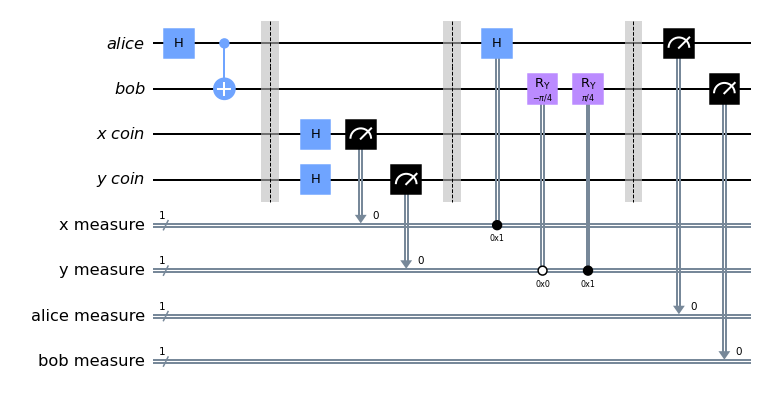

In [8]:
circ = make_chsh_circuit()
circ.draw('mpl')

In [9]:
trials = 20000
win_prob = quantum_chsh_montecarlo(trials)
print(win_prob)

0.85415
